<a href="https://colab.research.google.com/github/Shubham-naik-ai/Jforce/blob/main/Jforce_assignment_2(Undersampling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# Importing usefull libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
from google.colab import drive
drive.mount('/content/drive')
working_dir_path = '/content/drive/MyDrive/Jforce/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [69]:
#Loading the clean Dataset
df = pd.read_csv(working_dir_path + 'finaldata.csv')

## **Balancing Data and Modelling**

In [70]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Extract features and target variable
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Create a RandomUnderSampler object to undersample the majority class
rus = RandomUnderSampler(random_state=42)

# Fit and transform the data using the RandomUnderSampler object
X_resampled, y_resampled = rus.fit_resample(X, y)

# Print the new class distribution after undersampling
print("Resampled class distribution: ", Counter(y_resampled))

Resampled class distribution:  Counter({0: 3979, 1: 3979})


In [71]:
columns = list(df.columns)

In [72]:
columns.pop()

'loan_status'

In [73]:
balance_df = pd.DataFrame(X_resampled, columns=columns)

In [74]:
balance_df['loan_status'] = y_resampled

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

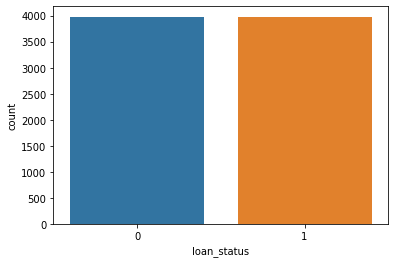

In [75]:
sns.countplot('loan_status', data = balance_df)


In [76]:
balance_df[balance_df['loan_status']==1]


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status
3979,6000.0,6000.0,6000.000000,0,27,196.75,1,9,5,3,...,655.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
3980,4000.0,4000.0,4000.000000,0,307,123.77,0,2,5,0,...,780.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
3981,8000.0,8000.0,7500.000000,0,83,270.91,2,13,0,3,...,760.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
3982,2700.0,2700.0,2700.000000,0,304,83.27,0,2,5,0,...,785.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
3983,7125.0,7125.0,7125.000000,0,294,216.08,0,1,2,3,...,620.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7953,8000.0,8000.0,7968.884548,1,138,191.21,3,16,6,3,...,680.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
7954,6000.0,6000.0,5975.000000,0,295,182.51,0,1,10,0,...,750.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
7955,4800.0,4800.0,4800.000000,0,313,149.34,0,2,9,3,...,660.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1
7956,12500.0,12500.0,12000.000000,0,300,383.35,0,3,0,3,...,560.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,1


In [77]:
df = balance_df.copy()


In [78]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status
0,2500.0,2500.0,2500.0,1,141,59.83,2,13,0,3,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,0
1,5375.0,5375.0,5350.0,1,65,121.45,1,9,0,3,...,515.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,0
2,9000.0,9000.0,9000.0,0,88,305.38,2,10,0,3,...,615.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,0
3,10000.0,10000.0,10000.0,0,16,325.74,1,6,3,3,...,650.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,0
4,6000.0,6000.0,6000.0,0,41,198.46,1,7,1,3,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,0


In [79]:
features = ['funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'purpose',
       'title', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low']

In [80]:
features

['funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'title',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low']

In [81]:
from sklearn import preprocessing

In [82]:
dataset_pr = df.copy()
     
from scipy.stats import zscore

X = dataset_pr[features].apply(zscore)
     
y = df['loan_status']
     
X.head()

,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low
0,-1.263411,-1.163767,1.766686,-0.137386,-1.358084,0.369246,-1.343780,0.840908,-1.001531,0.282414,...,-1.144204,-0.849073,-0.273971,-0.127321,-0.139441,-1.584968,-0.511136,0.643817,-1.729699,-3.891045
1,-0.640665,-0.544888,1.766686,-0.822143,-0.924498,-0.229035,-1.343780,0.840908,-1.657306,1.507852,...,-1.094005,-0.761357,-0.273971,0.044873,-0.133172,1.023678,-0.509840,0.643817,-1.498042,-0.663896
2,0.144537,0.247712,-0.566031,-0.614914,0.369715,-0.079465,-1.343780,0.840908,-1.001531,0.282414,...,-0.959228,-0.728467,-0.273971,0.242861,-0.125880,-0.195949,-0.376691,0.643817,-0.339760,-0.037265
3,0.361144,0.464863,-0.566031,-1.263630,0.512977,-0.677747,-0.481516,0.840908,2.058752,0.282414,...,0.007041,0.006438,-0.273971,0.470025,-0.116300,1.328585,-0.361952,0.643817,0.065638,0.182056
4,-0.505285,-0.403740,-0.566031,-1.038381,-0.382622,-0.528176,-1.056358,0.840908,1.009512,-0.943023,...,-0.947792,-0.813290,-0.273971,0.044896,-0.132949,1.294706,-0.454092,0.643817,-1.729699,-3.891045


## Implementing Logistic Regression

In [83]:
df_log_reg = df.copy()


In [84]:
df_log_reg.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status
0,2500.0,2500.0,2500.0,1,141,59.83,2,13,0,3,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,0
1,5375.0,5375.0,5350.0,1,65,121.45,1,9,0,3,...,515.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,0
2,9000.0,9000.0,9000.0,0,88,305.38,2,10,0,3,...,615.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,0
3,10000.0,10000.0,10000.0,0,16,325.74,1,6,3,3,...,650.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,0
4,6000.0,6000.0,6000.0,0,41,198.46,1,7,1,3,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,0


In [85]:
X = df_log_reg.drop(['loan_status'],axis=1)
y = df_log_reg['loan_status']

In [86]:
columns = X.columns


In [87]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)


In [89]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [90]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [91]:
optimized_clf = grid_lr_clf.best_estimator_


In [92]:
grid_lr_clf.best_params_


{'C': 1000, 'penalty': 'l2'}

In [93]:
grid_lr_clf.best_score_


0.9976661970239974

In [94]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [95]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [96]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.9994614003590664
The accuracy on test data is  0.9958123953098827


In [97]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.9958123953098827
The precision on test data is  0.9974874371859297
The recall on test data is  0.9941569282136895
The f1 on test data is  0.9958193979933111
The roc_score on test data is  0.9958179599051641


[[2782    3]
 [   0 2785]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

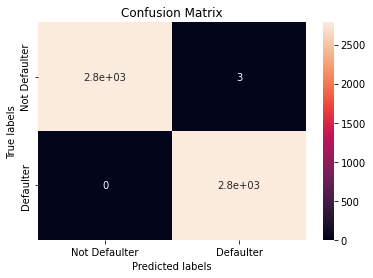

In [98]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [99]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })


In [100]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]


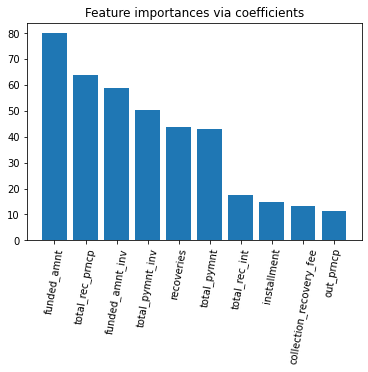

In [101]:
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [102]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]


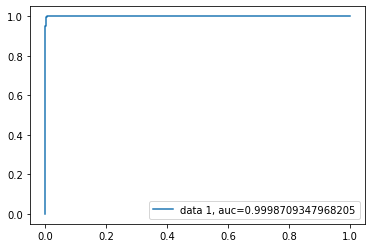

In [103]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## **Implementing SVC**

In [104]:
# defining parameter range 

param_grid = {'C': [0.1, 1, 10, 100],'kernel': ['rbf']} 

In [105]:
X = df.drop(['loan_status'],axis=1)
y = df['loan_status']

In [106]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)


In [108]:
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [109]:
optimal_SVC_clf = grid_clf.best_estimator_


In [110]:
grid_clf.best_params_


{'C': 10, 'kernel': 'rbf'}

In [111]:
grid_clf.best_score_


0.9736084224648579

In [112]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [113]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.9994614003590664
The accuracy on test data is  0.9958123953098827


In [114]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.9803182579564489
The precision on test data is  0.9865996649916248
The recall on test data is  0.9743589743589743
The f1 on test data is  0.9804411152725759
The roc_score on test data is  0.9803940758139231


[[2782    3]
 [   0 2785]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

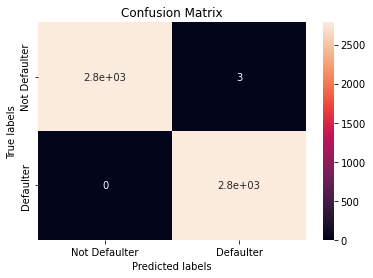

In [115]:
 # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [116]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [117]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]


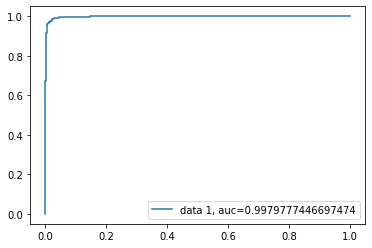

In [118]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


## **Implementing Decision Tree**

In [119]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}


In [120]:
from sklearn.tree import DecisionTreeClassifier  


In [121]:
X = df.drop(['loan_status'],axis=1)
y = df['loan_status']


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)


In [123]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [124]:
grid_DTC_clf.best_score_


0.9375243719012868

In [125]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_


In [126]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [127]:
grid_DTC_clf.best_params_


{'max_depth': 20, 'min_samples_split': 0.1}

In [128]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.9271095152603231
The accuracy on test data is  0.9355108877721943


## **Implementing RandomForest**

In [129]:
from sklearn.ensemble import RandomForestClassifier


In [130]:
X = df.drop(['loan_status'],axis=1)
y = df['loan_status']

In [131]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [132]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [133]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  1.0
The accuracy on test data is  0.9945561139028476


In [134]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.9945561139028476
The precision on test data is  0.9991624790619765
The recall on test data is  0.9900414937759336
The f1 on test data is  0.9945810754481035
The roc_score on test data is  0.9945980926191587


In [135]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [136]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [137]:
grid_rf_clf.best_score_


0.9895874920307751

In [138]:
grid_rf_clf.best_params_


{'max_depth': 30, 'n_estimators': 150}

In [139]:
optimal_rf_clf = grid_rf_clf.best_estimator_


In [140]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [141]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  1.0
The accuracy on test data is  0.9949748743718593


In [142]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.9949748743718593
The precision on test data is  0.9991624790619765
The recall on test data is  0.9908637873754153
The f1 on test data is  0.9949958298582152
The roc_score on test data is  0.9950095963904103


In [143]:
len(optimal_rf_clf.feature_importances_)


49

In [144]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [145]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]


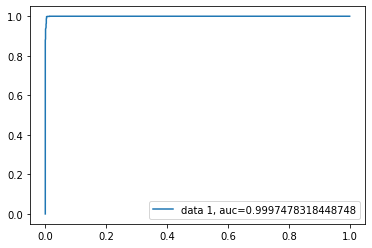

In [146]:
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## **Implementing XGBoost**

In [147]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb

In [148]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable

dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [149]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [150]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

[20:45:49] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [151]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=3, microseconds=727811)

In [152]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 

#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [153]:
len(train_class_preds_probs)


5570

In [154]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [155]:
test_class_preds_probs[:20]


array([0.91486084, 0.04086204, 0.95801705, 0.86597395, 0.928694  ,
       0.04086204, 0.95801705, 0.04086204, 0.04086204, 0.92449605,
       0.94736916, 0.04086204, 0.9569945 , 0.9380393 , 0.0387071 ,
       0.92304033, 0.04086204, 0.04086204, 0.04716886, 0.04086204],
      dtype=float32)

In [156]:
test_class_preds[:20]


[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0]

In [157]:
len(y_train)


5570

In [158]:
len(train_class_preds)


5570

In [159]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.9967684021543985
The accuracy on test data is  0.9937185929648241


In [160]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.9937185929648241
The precision on test data is  0.9991624790619765
The recall on test data is  0.9884009942004971
The f1 on test data is  0.9937526030820492
The roc_score on train data is  0.9937771270748462


## **Hyperparameter Tuning**

In [161]:
from xgboost import  XGBClassifier


In [162]:
X = df_log_reg.drop(['loan_status'],axis=1)
y = df_log_reg['loan_status']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [164]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [165]:
 gsearch1.best_score_

0.9932453660069117

In [166]:
optimal_xgb = gsearch1.best_estimator_

In [167]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [168]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  1.0
The accuracy on test data is  0.9949748743718593


In [169]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.9949748743718593
The precision on test data is  0.9987437185929648
The recall on test data is  0.9912718204488778
The f1 on test data is  0.9949937421777222
The roc_score on train data is  0.9950029988320339


In [170]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

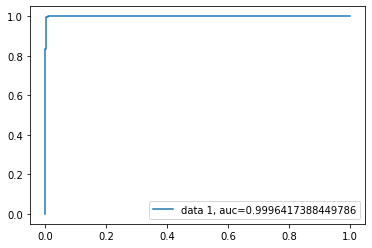

In [171]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


## **Artificial Neural Networks (ANNs)**

## **Artificial Neural Networks (ANNs)**

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import (accuracy_score,  confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,)

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC


In [ ]:
X_train, y_train = df_log_reg.drop('loan_status', axis=1), df.loan_status
X_test, y_test = df_log_reg.drop('loan_status', axis=1), df.loan_status

In [ ]:
X_train.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                            int64
int_rate                        int64
installment                   float64
grade                           int64
sub_grade                       int64
emp_length                      int64
home_ownership                  int64
annual_inc                    float64
verification_status             int64
issue_d                         int64
pymnt_plan                      int64
purpose                         int64
title                           int64
addr_state                      int64
dti                           float64
delinq_2yrs                   float64
earliest_cr_line                int64
fico_range_low                  int64
fico_range_high                 int64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util  

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [ ]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [ ]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [ ]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
1432/1432 [==============================] - 20s 9ms/step - loss: 0.1290 - AUC: 0.9894 - val_loss: 0.0434 - val_AUC: 0.9990
Epoch 2/20
1432/1432 [==============================] - 14s 9ms/step - loss: 0.0898 - AUC: 0.9946 - val_loss: 0.0375 - val_AUC: 0.9995
Epoch 3/20
1432/1432 [==============================] - 15s 11ms/step - loss: 0.0784 - AUC: 0.9958 - val_loss: 0.0254 - val_AUC: 0.9997
Epoch 4/20
1432/1432 [==============================] - 14s 10ms/step - loss: 0.0716 - AUC: 0.9962 - val_loss: 0.0329 - val_AUC: 0.9997
Epoch 5/20
1432/1432 [==============================] - 12s 9ms/step - loss: 0.0648 - AUC: 0.9968 - val_loss: 0.0325 - val_AUC: 0.9997
Epoch 6/20
1432/1432 [==============================] - 13s 9ms/step - loss: 0.0569 - AUC: 0.9973 - val_loss: 0.0356 - val_AUC: 0.9998
Epoch 7/20
1432/1432 [==============================] - 12s 9ms/step - loss: 0.0542 - AUC: 0.9978 - val_loss: 0.0244 - val_AUC: 0.9999
Epoch 8/20
1432/1432 [==============================]

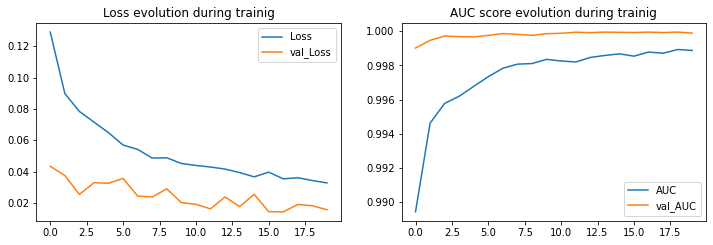

In [ ]:
plot_learning_evolution(r)

In [ ]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

1432/1432 [==============================] - 3s 2ms/step
Train Result:
Accuracy Score: 99.53%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.992618      0.998112   0.99535      0.995365      0.995365
recall         0.998122      0.992577   0.99535      0.995350      0.995350
f1-score       0.995363      0.995337   0.99535      0.995350      0.995350
support    22902.000000  22902.000000   0.99535  45804.000000  45804.000000
_______________________________________________
Confusion Matrix: 
 [[22859    43]
 [  170 22732]]



In [ ]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

1432/1432 [==============================] - 3s 2ms/step
Test Result:
Accuracy Score: 99.53%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.992618      0.998112   0.99535      0.995365      0.995365
recall         0.998122      0.992577   0.99535      0.995350      0.995350
f1-score       0.995363      0.995337   0.99535      0.995350      0.995350
support    22902.000000  22902.000000   0.99535  45804.000000  45804.000000
_______________________________________________
Confusion Matrix: 
 [[22859    43]
 [  170 22732]]



In [ ]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}

1432/1432 [==============================] - 3s 2ms/step


In [172]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import (accuracy_score,  confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,)

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC


In [173]:
X_train, y_train = df_log_reg.drop('loan_status', axis=1), df.loan_status
X_test, y_test = df_log_reg.drop('loan_status', axis=1), df.loan_status

In [174]:
X_train.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                            int64
int_rate                        int64
installment                   float64
grade                           int64
sub_grade                       int64
emp_length                      int64
home_ownership                  int64
annual_inc                    float64
verification_status             int64
pymnt_plan                      int64
purpose                         int64
title                           int64
addr_state                      int64
dti                           float64
delinq_2yrs                   float64
earliest_cr_line                int64
fico_range_low                  int64
fico_range_high                 int64
inq_last_6mths                float64
open_acc                      float64
pub_rec                         int64
revol_bal                     float64
revol_util                      int64
total_acc   

In [175]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [176]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [177]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [178]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [179]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
249/249 [==============================] - 5s 9ms/step - loss: 0.2214 - AUC: 0.9705 - val_loss: 0.1874 - val_AUC: 0.9928
Epoch 2/20
249/249 [==============================] - 2s 7ms/step - loss: 0.1588 - AUC: 0.9842 - val_loss: 0.0748 - val_AUC: 0.9972
Epoch 3/20
249/249 [==============================] - 2s 6ms/step - loss: 0.1434 - AUC: 0.9866 - val_loss: 0.0674 - val_AUC: 0.9982
Epoch 4/20
249/249 [==============================] - 2s 7ms/step - loss: 0.1364 - AUC: 0.9883 - val_loss: 0.0689 - val_AUC: 0.9977
Epoch 5/20
249/249 [==============================] - 2s 7ms/step - loss: 0.1308 - AUC: 0.9890 - val_loss: 0.0546 - val_AUC: 0.9985
Epoch 6/20
249/249 [==============================] - 2s 9ms/step - loss: 0.1153 - AUC: 0.9917 - val_loss: 0.0509 - val_AUC: 0.9990
Epoch 7/20
249/249 [==============================] - 2s 9ms/step - loss: 0.1148 - AUC: 0.9917 - val_loss: 0.0578 - val_AUC: 0.9992
Epoch 8/20
249/249 [==============================] - 2s 7ms/step - loss: 0.

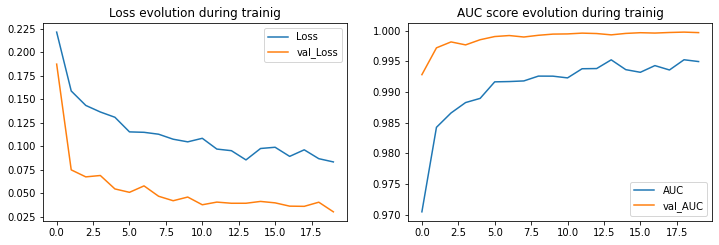

In [180]:
plot_learning_evolution(r)

In [181]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

249/249 [==============================] - 1s 3ms/step
Train Result:
Accuracy Score: 98.99%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.986038     0.993919  0.989947     0.989979      0.989979
recall        0.993968     0.985926  0.989947     0.989947      0.989947
f1-score      0.989987     0.989907  0.989947     0.989947      0.989947
support    3979.000000  3979.000000  0.989947  7958.000000   7958.000000
_______________________________________________
Confusion Matrix: 
 [[3955   24]
 [  56 3923]]



In [182]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

249/249 [==============================] - 0s 2ms/step
Test Result:
Accuracy Score: 98.99%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.986038     0.993919  0.989947     0.989979      0.989979
recall        0.993968     0.985926  0.989947     0.989947      0.989947
f1-score      0.989987     0.989907  0.989947     0.989947      0.989947
support    3979.000000  3979.000000  0.989947  7958.000000   7958.000000
_______________________________________________
Confusion Matrix: 
 [[3955   24]
 [  56 3923]]



In [183]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}

249/249 [==============================] - 0s 2ms/step
